<a href="https://colab.research.google.com/github/RichardOwenH/data_field/blob/main/Final_Project_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Project

Group 8:

Dwi Putri Natalia

Richard Owen Hendarto

Yayang Alvianti Amarona

## 1. Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from datetime import datetime
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Python/userprofile.csv', header = 0)
df.head()

,userID,latitude,longitude,smoker,drink_level,dress_preference,ambience,transport,marital_status,hijos,birth_year,interest,personality,religion,activity,color,weight,budget,height
0,U1001,22.139997,-100.978803,false,abstemious,informal,family,on foot,single,independent,1989,variety,thrifty-protector,none,student,black,69,medium,1.77
1,U1002,22.150087,-100.983325,false,abstemious,informal,family,public,single,independent,1990,technology,hunter-ostentatious,Catholic,student,red,40,low,1.87
2,U1003,22.119847,-100.946527,false,social drinker,formal,family,public,single,independent,1989,none,hard-worker,Catholic,student,blue,60,low,1.69
3,U1004,18.867000,-99.183000,false,abstemious,informal,family,public,single,independent,1940,variety,hard-worker,none,professional,green,44,medium,1.53
4,U1005,22.183477,-100.959891,false,abstemious,no preference,family,public,single,independent,1992,none,thrifty-protector,Catholic,student,black,65,medium,1.69


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userID            138 non-null    object 
 1   latitude          138 non-null    float64
 2   longitude         138 non-null    float64
 3   smoker            138 non-null    object 
 4   drink_level       138 non-null    object 
 5   dress_preference  138 non-null    object 
 6   ambience          138 non-null    object 
 7   transport         138 non-null    object 
 8   marital_status    138 non-null    object 
 9   hijos             138 non-null    object 
 10  birth_year        138 non-null    int64  
 11  interest          138 non-null    object 
 12  personality       138 non-null    object 
 13  religion          138 non-null    object 
 14  activity          138 non-null    object 
 15  color             138 non-null    object 
 16  weight            138 non-null    int64  
 1

### Business Question

1. Budget terhadap golongan umur

2. Golongan umur terhadap interest, color (untuk design)

3. Pembagian ruangan khusus untuk perokok (perlu/tidak)

4. Titik koordinat mengunakan longtitude dan latitude (untuk ekspansi) - scatter plot
-> mengetahui lokasi resto
--> titik koordinat dan transport
---> titik yg banyak pejalan kaki berarti resto didaerah situ

5. Penggunaan pakaian dengan budget yang dikeluarkan (pelayanan dan design)
-count ->

6. Pengaruh aktivitas pengunjung dengan tingkat drink_level (perlu menyediakan stok minuman beralkohol/tidak)

7. Cek budget dengan personality (penentuan harga)

8. Ambience dengan budget (penentuan promo)

9. Transport -> transport.count (penentuan lahan parkir)

10. religion (penentuan promo season/hari besar agama)

11. ambience & ambience.count (penentuan meja/kursi)


Relasi yang bisa ambil:
1. Golongan umur terhadap penggunaan pakaian
2. Golongan umur terhadap personality
3. Relasi drink_level terhadap golongan umur
4. Personality terhadap color
5. Budget terhadap transport
6. presonality terhadap budget
7. weight and height with smoker and drink level


## 2. Convert Data Types

In [ ]:
df['birth_year'] = pd.to_datetime(df['birth_year'],format="%Y")

In [ ]:
# change after remove missing data
# df['smoker'] = df['smoker'].astype('bool')

## 3. Remove Duplicates

In [ ]:
df = df.drop_duplicates(subset=['userID'])

## 4. Get Desciption of Data

In [ ]:
df.describe()

,latitude,longitude,weight,height
count,138.000000,138.000000,138.000000,138.000000
mean,21.810389,-100.291857,64.869565,1.667536
std,1.552529,0.869916,17.214332,0.130473
min,18.813348,-101.054680,40.000000,1.200000
25%,22.126030,-100.983000,53.000000,1.600000
50%,22.150497,-100.937788,65.000000,1.690000
75%,22.186642,-99.183251,74.750000,1.750000
max,23.771030,-99.067106,120.000000,2.000000


## 5. Handle Missing Values

In [ ]:
missing_value_formats = ["n.a.","?","NA","n/a", "na", "none","--"]

In [ ]:
df['smoker'].value_counts()

false    109
true      26
?          3
Name: smoker, dtype: int64

In [ ]:
df['smoker'] = df['smoker'].replace(missing_value_formats,'false')

In [ ]:
# change data type
df['smoker'] = df['smoker'].map({'true': True, 'false': False})

In [ ]:
df['dress_preference'].value_counts()

no preference    53
formal           41
informal         35
?                 5
elegant           4
Name: dress_preference, dtype: int64

In [ ]:
df['dress_preference'] = df['dress_preference'].replace(missing_value_formats,'unknown')

In [ ]:
df['ambience'].value_counts()

family      70
friends     46
solitary    16
?            6
Name: ambience, dtype: int64

In [ ]:
df['ambience'] = df['ambience'].replace(missing_value_formats,'unknown')

In [ ]:
df['transport'].value_counts()

public       82
car owner    35
on foot      14
?             7
Name: transport, dtype: int64

In [ ]:
df['transport'] = df['transport'].replace(missing_value_formats,'unknown')

In [ ]:
df['budget'].value_counts()

medium    91
low       35
?          7
high       5
Name: budget, dtype: int64

In [ ]:
df['budget'] = df['budget'].replace(missing_value_formats,'unknown')

In [ ]:
df['budget'].value_counts()

medium     91
low        35
unknown     7
high        5
Name: budget, dtype: int64

In [ ]:
df['religion'].value_counts()

Catholic     99
none         30
Christian     7
Mormon        1
Jewish        1
Name: religion, dtype: int64

In [ ]:
df['religion'] = df['religion'].replace(missing_value_formats,'Unknown')

## 6. Handle Outliers

In [ ]:
# q1 = df['user_age'].quantile(q=0.25)
# q3 = df['user_age'].quantile(q=0.75)
# iqr = q3-q1
# print(f'q1 = {q1}, q3= {q3}, iqr= {iqr}')

In [ ]:
#df['user_age'].describe()

In [ ]:
# age_upper_fence = q3+ (1.5*iqr) #batas atas
# age_lower_fence = q1- (1.5*iqr) #batas bawah
# print(f'user_age_upper_fence = {age_upper_fence}, user_age_lower_fence = {age_lower_fence}')

## 7. Relationship with plots

In [ ]:
import matplotlib.pyplot as plt 
import matplotlib.colors
import seaborn as sns
from matplotlib.colors import ListedColormap, LinearSegmentedColormap


Text(0.5, 1.0, 'Correlation Heatmap')

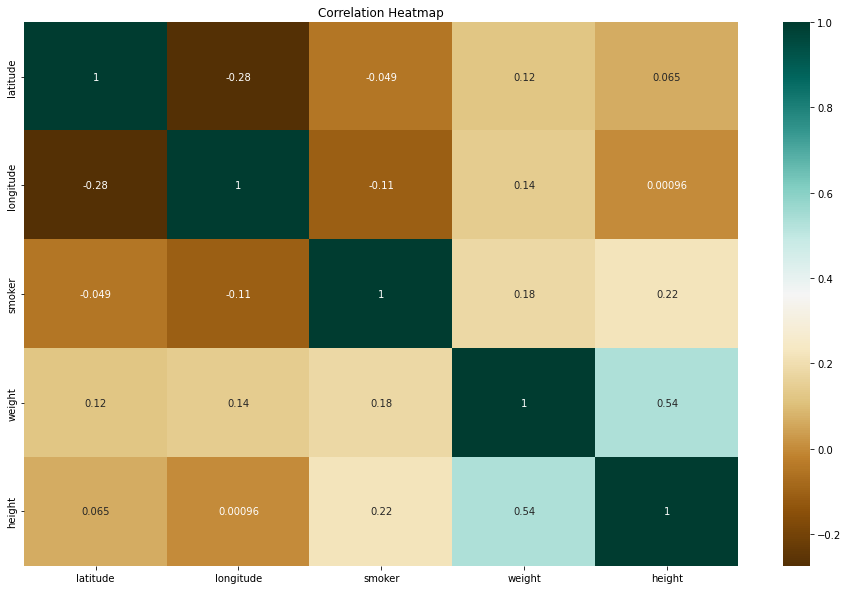

In [ ]:
plt.figure(figsize=(16,10))
heatmap = sns.heatmap(df.corr(),annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap')

In [ ]:
from datetime import datetime, date

In [ ]:
def user_age(birthdate):
    today = date.today()
    age = today.year - birthdate.year 
    return age

df['user_age'] = df['birth_year'].apply(user_age)


In [ ]:
df.head()

,userID,latitude,longitude,smoker,drink_level,dress_preference,ambience,transport,marital_status,hijos,birth_year,interest,personality,religion,activity,color,weight,budget,height,user_age
0,U1001,22.139997,-100.978803,False,abstemious,informal,family,on foot,single,independent,1989-01-01,variety,thrifty-protector,Unknown,student,black,69,medium,1.77,33
1,U1002,22.150087,-100.983325,False,abstemious,informal,family,public,single,independent,1990-01-01,technology,hunter-ostentatious,Catholic,student,red,40,low,1.87,32
2,U1003,22.119847,-100.946527,False,social drinker,formal,family,public,single,independent,1989-01-01,none,hard-worker,Catholic,student,blue,60,low,1.69,33
3,U1004,18.867000,-99.183000,False,abstemious,informal,family,public,single,independent,1940-01-01,variety,hard-worker,Unknown,professional,green,44,medium,1.53,82
4,U1005,22.183477,-100.959891,False,abstemious,no preference,family,public,single,independent,1992-01-01,none,thrifty-protector,Catholic,student,black,65,medium,1.69,30


In [ ]:
def dAge_mapping(x):
  if x['user_age']<=15:
    return 'children'
  elif x['user_age']<=24:
    return 'teenager'
  elif x['user_age']<=34:
    return 'adult'
  elif x['user_age']<=44:
    return 'middle-aged'
  elif x['user_age']<=64:
    return 'retiring'
  else:
    return 'elderly'

In [ ]:
df['user_category'] = df.apply(lambda x:dAge_mapping(x), axis=1)

In [ ]:
df.head()

,userID,latitude,longitude,smoker,drink_level,dress_preference,ambience,transport,marital_status,hijos,...,interest,personality,religion,activity,color,weight,budget,height,user_age,user_category
0,U1001,22.139997,-100.978803,False,abstemious,informal,family,on foot,single,independent,...,variety,thrifty-protector,Unknown,student,black,69,medium,1.77,33,adult
1,U1002,22.150087,-100.983325,False,abstemious,informal,family,public,single,independent,...,technology,hunter-ostentatious,Catholic,student,red,40,low,1.87,32,adult
2,U1003,22.119847,-100.946527,False,social drinker,formal,family,public,single,independent,...,none,hard-worker,Catholic,student,blue,60,low,1.69,33,adult
3,U1004,18.867000,-99.183000,False,abstemious,informal,family,public,single,independent,...,variety,hard-worker,Unknown,professional,green,44,medium,1.53,82,elderly
4,U1005,22.183477,-100.959891,False,abstemious,no preference,family,public,single,independent,...,none,thrifty-protector,Catholic,student,black,65,medium,1.69,30,adult


In [ ]:
category_count = df['user_category'].value_counts()
category_count

adult          100
middle-aged     26
elderly         10
retiring         2
Name: user_category, dtype: int64

In [ ]:
df_user = df.groupby('user_category')[['userID']].count().sort_values(by = 'userID',ascending = True).reset_index()
df_user

,user_category,userID
0,retiring,2
1,elderly,10
2,middle-aged,26
3,adult,100


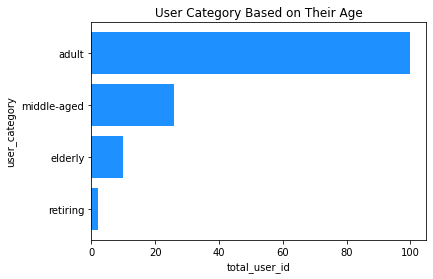

In [ ]:
# Create Bar Chart
plot1 = plt.barh(df_user['user_category'], df_user['userID'], color='dodgerblue',)

# Set Label
plt.xlabel('total_user_id')
plt.ylabel('user_category')
plt.title('User Category Based on Their Age')

# Show Chart
plt.show()

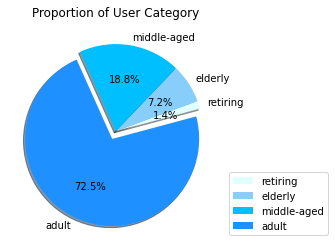

In [ ]:
colors_var      = ['lightcyan','lightskyblue','deepskyblue','dodgerblue']
explode_var = [0., 0., 0., 0.1] #untuk jarak perpienya

# Create Chart (autopct: menempatkan angka dibelakang koma )
plot1= plt.pie(df_user['userID'], labels=df_user['user_category'], autopct='%1.1f%%', startangle=15, shadow = True, colors=colors_var,explode=explode_var)

#Set Label
plt.title('Proportion of User Category')

#Add Legend
plt.legend(loc='lower right', bbox_to_anchor=(1.5,0))

#Show Chart
plt.show()

In [ ]:
df_interest = df.groupby('interest')[['userID']].count().sort_values(by = 'userID',ascending = True).reset_index()
df_interest

,interest,userID
0,retro,6
1,eco-friendly,16
2,none,30
3,technology,36
4,variety,50


In [ ]:
df['interest'].value_counts()

variety         50
technology      36
none            30
eco-friendly    16
retro            6
Name: interest, dtype: int64

In [ ]:
df_color = df.groupby('color')[['userID']].count().sort_values(by = 'userID',ascending = True).reset_index()
df_color

,color,userID
0,orange,4
1,purple,11
2,white,11
3,yellow,12
4,red,15
5,green,19
6,black,21
7,blue,45


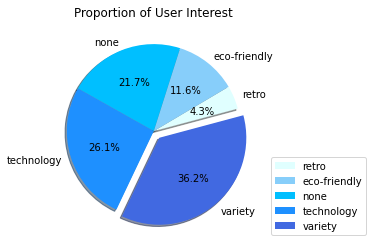

In [ ]:
colors_var      = ['lightcyan','lightskyblue','deepskyblue','dodgerblue','royalblue']
explode_var = [0., 0., 0., 0., 0.1] #untuk jarak perpienya

# Create Chart (autopct: menempatkan angka dibelakang koma )
plot1= plt.pie(df_interest['userID'], labels=df_interest['interest'], autopct='%1.1f%%', startangle=15, shadow = True, colors=colors_var,explode=explode_var)

#Set Label
plt.title('Proportion of User Interest')

#Add Legend
plt.legend(loc='lower right', bbox_to_anchor=(1.5,0))

#Show Chart
plt.show()

In [ ]:
# no need extra room for smoker
df_smoker = df.groupby('smoker')[['userID']].count().sort_values(by = 'userID',ascending = True).reset_index()
df_smoker

,smoker,userID
0,True,26
1,False,112


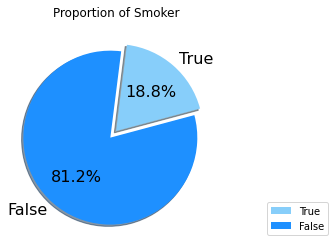

In [ ]:
colors_var      = ['lightskyblue','dodgerblue']
explode_var = [0., 0.1] #untuk jarak perpienya

# Create Chart (autopct: menempatkan angka dibelakang koma )
plot1= plt.pie(df_smoker['userID'], labels=df_smoker['smoker'], autopct='%1.1f%%', startangle=15, shadow = True, colors=colors_var,explode=explode_var, textprops={'fontsize': 16})

#Set Label
plt.title('Proportion of Smoker')

#Add Legend
plt.legend(loc='lower right', bbox_to_anchor=(1.5,0))

#Show Chart
plt.show()

In [ ]:
df['transport'].value_counts()

public       82
car owner    35
on foot      14
unknown       7
Name: transport, dtype: int64

In [ ]:
# menyediakan lahan parkir
df_transport = df.groupby('transport')[['userID']].count().sort_values(by = 'userID',ascending = True).reset_index()
df_transport

,transport,userID
0,unknown,7
1,on foot,14
2,car owner,35
3,public,82


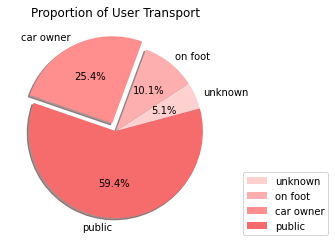

In [ ]:
colors_var      = ['#fed0d0','#fdafaf','#ff8e8e','#f66c6c']
explode_var = [0., 0., 0.1, 0.] #untuk jarak perpienya

# Create Chart (autopct: menempatkan angka dibelakang koma )
plot1= plt.pie(df_transport['userID'], labels=df_transport['transport'], autopct='%1.1f%%', startangle=15, shadow = True, colors=colors_var,explode=explode_var)

#Set Label
plt.title('Proportion of User Transport')

#Add Legend
plt.legend(loc='lower right', bbox_to_anchor=(1.5,0))

#Show Chart
plt.show()

In [ ]:
df1 = df.groupby(['budget','user_category'])['userID'].aggregate('count').reset_index().sort_values(by = 'userID',ascending = False)
df1

,budget,user_category,userID
5,medium,adult,63
2,low,adult,30
7,medium,middle-aged,22
6,medium,elderly,4
9,unknown,adult,4
0,high,adult,3
4,low,middle-aged,3
1,high,elderly,2
3,low,elderly,2
8,medium,retiring,2


Text(0, 0.5, 'sum_of_user')

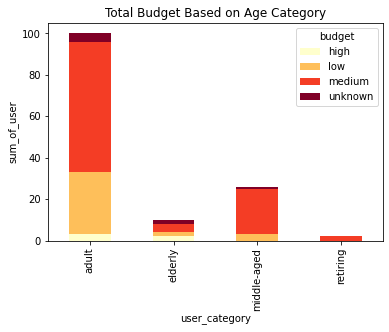

In [ ]:
# penetuan harga (part 1)
colors_var      = ['lightcyan','lightskyblue','deepskyblue','dodgerblue','royalblue']
df.groupby(['user_category','budget'])['userID'].aggregate('count').unstack().plot(kind='bar',cmap = 'YlOrRd', stacked = True)

plt.title('Total Budget Based on Age Category')
plt.ylabel('sum_of_user')

In [ ]:
# penentuan harga (part2)
df3 = df.groupby(['personality','budget'])['userID'].aggregate('count').reset_index().sort_values(by = 'userID',ascending = False)
df3.head()

,personality,budget,userID
12,thrifty-protector,medium,41
5,hard-worker,medium,40
4,hard-worker,low,14
11,thrifty-protector,low,14
9,hunter-ostentatious,medium,8


Text(0, 0.5, 'sum_of_user')

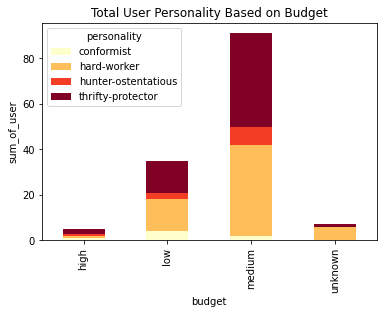

In [ ]:
df.groupby(['budget','personality'])['userID'].aggregate('count').unstack().plot(kind='bar',cmap='YlOrRd', stacked = True)
plt.title('Total User Personality Based on Budget')
plt.ylabel('sum_of_user')
# hard-worker : karyawan
# thrifty-protector: mahasiswa

In [ ]:
#Table Structure 
df2 = df.groupby(['ambience','budget'])['userID'].aggregate('count').reset_index().sort_values(by = 'userID',ascending = False)
df2

,ambience,budget,userID
2,family,medium,54
5,friends,medium,28
4,friends,low,15
1,family,low,14
7,solitary,medium,8
6,solitary,low,5
11,unknown,unknown,4
3,friends,high,3
8,solitary,unknown,3
0,family,high,2


Text(0, 0.5, 'sum_of_user')

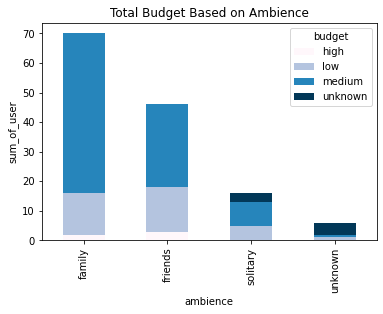

In [ ]:
df.groupby(['ambience','budget'])['userID'].aggregate('count').unstack().plot(kind='bar',cmap='PuBu',stacked = True)

plt.title('Total Budget Based on Ambience')
plt.ylabel('sum_of_user')

In [ ]:
# service untuk customer
df4 = df.groupby(['dress_preference','budget'])['userID'].aggregate('count').reset_index().sort_values(by = 'userID',ascending = False)
df4.head()
# pelayan pakaian seragam (kaos berkerah)

,dress_preference,budget,userID
12,no preference,medium,38
5,formal,medium,30
8,informal,medium,20
7,informal,low,12
11,no preference,low,12


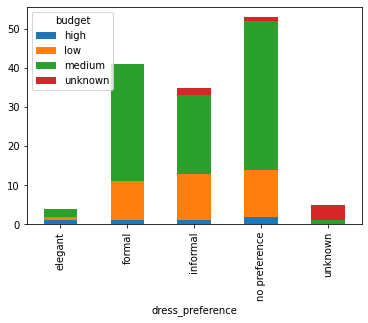

In [ ]:
df.groupby(['dress_preference','budget'])['userID'].aggregate('count').unstack().plot(kind='bar', stacked = True)

In [ ]:
df5 = df.groupby(['interest','user_category'])['userID'].aggregate('count').reset_index().sort_values(by = 'userID',ascending = False)
df5

,interest,user_category,userID
11,variety,adult,37
3,none,adult,23
8,technology,adult,22
0,eco-friendly,adult,13
10,technology,middle-aged,12
13,variety,middle-aged,9
4,none,elderly,5
6,retro,adult,5
12,variety,elderly,3
1,eco-friendly,middle-aged,2


Text(0, 0.5, 'sum_of_user')

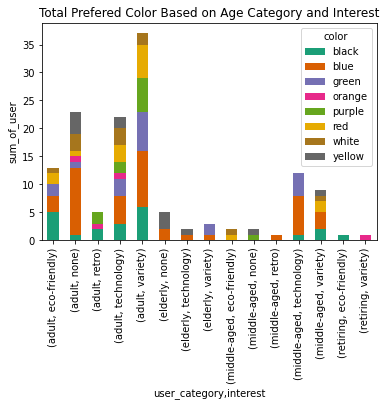

In [ ]:
#design resto (vibes)
df.groupby(['user_category','interest','color'])['userID'].aggregate('count').unstack().plot(kind='bar', cmap='Dark2',stacked = True)
plt.title('Total Prefered Color Based on Age Category and Interest')
plt.ylabel('sum_of_user')
#mayoritas warna biru

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning:

Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.



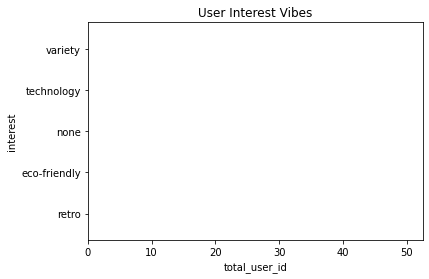

In [ ]:
#vibesnya bebas namun modern, dimana technologynya cukup penting.
# Create Chart
plot2 = plt.barh(df_interest['interest'], df_interest['userID'], color='')

# Set Label
plt.xlabel('total_user_id')
plt.ylabel('interest')
plt.title('User Interest Vibes')

# Show Chart
plt.show()

In [ ]:
#background
!pip install plotly

import plotly.express as px

fig = px.density_mapbox(df, lat=df['latitude'], lon=df['longitude'], hover_name=df['userID'], mapbox_style='stamen-terrain')
fig.show()

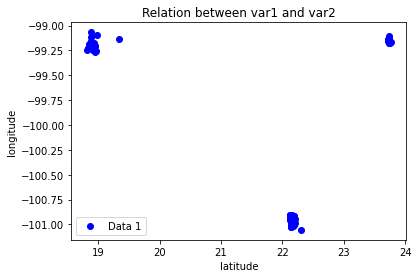

In [ ]:
# Create Chart
plot1 = plt.scatter(df['latitude'], df['longitude'], label='Data 1', color='b')
#plot2 = plt.scatter(x1, y1, label='Data 2', color='r')

# Set Label
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.title('Relation between var1 and var2')

plt.legend()

# Show Chart
plt.show()

In [ ]:
import seaborn as sns
import scipy
from scipy.stats.stats import pearsonr
from scipy.stats.stats import spearmanr

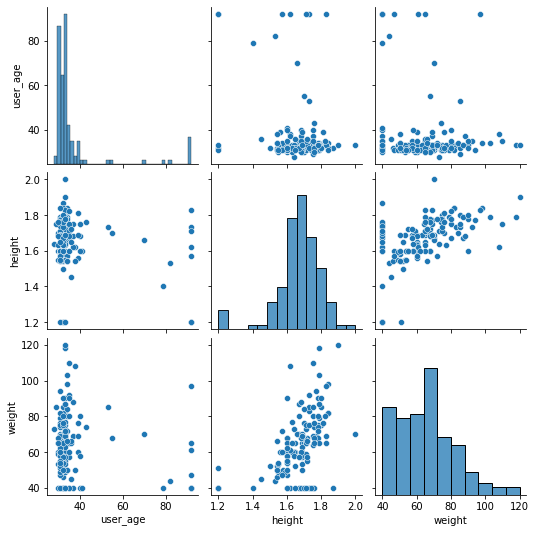

In [ ]:
sns.pairplot(df[['user_age','height','weight']])

In [ ]:
pearsonr_coef, p_value = pearsonr(df['weight'], df['height'])
pearsonr_coef

0.5355695822541061

In [ ]:
pearsonr_coef, p_value = pearsonr(df['user_age'], df['height'])
pearsonr_coef

-0.24384941855537443

In [ ]:
pearsonr_coef, p_value = pearsonr(df['user_age'], df['weight'])
pearsonr_coef

-0.14416280146641605

In [ ]:
# seasonal promotion
df_religion = df.groupby('religion')[['userID']].count().reset_index()
df_religion

,religion,userID
0,Catholic,99
1,Christian,7
2,Jewish,1
3,Mormon,1
4,Unknown,30


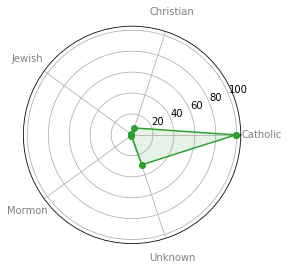

In [ ]:
df_reli= pd.DataFrame({'Col A': df_religion['religion'],
                   'Col B': df_religion['userID']})
fig = plt.figure()
ax = fig.add_subplot(111, projection="polar")

# theta has 5 different angles, and the first one repeated
theta = np.arange(len(df_reli) + 1) / float(len(df_reli)) * 2 * np.pi
# values has the 5 values from 'Col B', with the first element repeated
values = df_reli['Col B'].values
values = np.append(values, values[0])

# draw the polygon and the mark the points for each angle/value combination
l1, = ax.plot(theta, values, color="C2", marker="o", label="Name of Col B")
plt.xticks(theta[:-1], df_reli['Col A'], color='grey', size=10)
ax.tick_params(pad=10) # to increase the distance of the labels to the plot
# fill the area of the polygon with green and some transparency
ax.fill(theta, values, 'green', alpha=0.1)

# plt.legend() # shows the legend, using the label of the line plot (useful when there is more than 1 polygon)
#plt.title("Religion Majority of Customer")
plt.show()